In [19]:
import pprint
import requests
import csv
import json
import pandas as pd

In [20]:
secret = '7f65ecb2d4f1482a84c14d1e6a973b4b'

In [21]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

In [22]:
# Specify the query and number of returns
parameters = {
    'q': 'Russia Ukraine', # query phrase
    'pageSize': 8,  # maximum is 100
    'apiKey': secret # your own API key
}

In [23]:
# Make the request
response = requests.get(url, params=parameters)
field_names = ['title', 'url']
# Convert the response to JSON format and pretty print it
response_json = response.json()
articles=[]
for article in response_json['articles']:
    articles.append({'title': article['title'], 'url': article['url']})
#print(articles)

df = pd.DataFrame.from_dict(articles) 
df.to_csv('articles.csv',encoding='utf-8',index=False)
pprint.pprint(response_json)

{'articles': [{'author': 'Michael D. Shear',
               'content': 'Top officials including some world leaders from '
                          'other nations have made official visits to the '
                          'Ukrainian capital since the war began. Boris '
                          'Johnson, the prime minister of Britain, made a '
                          'surprise vis… [+830 chars]',
               'description': 'No American official has publicly visited '
                              'Ukraine since Russia launched its invasion in '
                              'late February.',
               'publishedAt': '2022-04-14T00:40:26Z',
               'source': {'id': None, 'name': 'New York Times'},
               'title': 'U.S. Considers Sending a High-Level Official to Kyiv',
               'url': 'https://www.nytimes.com/2022/04/13/world/europe/us-official-kyiv-ukraine.html',
               'urlToImage': 'https://static01.nyt.com/images/2022/04/13/multimedia/13ukrain

In [24]:
for i in response_json['articles']:
    print(i['title'])

U.S. Considers Sending a High-Level Official to Kyiv
Ukraine conflict: Why is Russia losing so many tanks?
Grieving Russians can't believe talk of war crimes in Ukraine
Military analysts forecast that the problems bedeviling Russia’s forces will continue in the east.
Why Brittney Griner Could Be the Last American Basketball Star in Russia
Ukraine - the narrative the West doesn't hear
Ukraine war: Russia bombards cities as eastern offensive begins
Ukraine war: US accuses Russia of 'depravity and brutality'


In [25]:
!pip install wordcloud

In [26]:
from wordcloud import WordCloud

In [27]:
# Create an empty string
text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
for i in response_json['articles']:
    text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])

U.S. Considers Sending a High-Level Official to Kyiv Ukraine conflict: Why is Russia losing so many tanks? Grieving Russians can't believe talk of war crimes in Ukraine Military analysts forecast that the problems bedeviling Russia’s forces will continue in the east. Why Brittney Griner Could Be the


In [28]:
import matplotlib.pyplot as plt

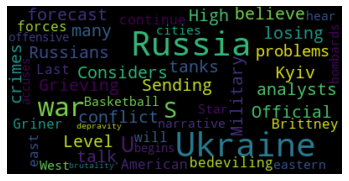

In [29]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
import requests
from bs4 import BeautifulSoup

In [31]:
file=open('articles.csv')
csvreader=csv.reader(file)
# header=next(csvreader)
article_urls=[]
for row in csvreader:
  article_urls.append(row[1])
print(article_urls)
file.close()

['url', 'https://www.nytimes.com/2022/04/13/world/europe/us-official-kyiv-ukraine.html', 'https://www.bbc.co.uk/news/world-61021388', 'https://www.bbc.co.uk/news/world-europe-61073897', 'https://www.nytimes.com/live/2022/04/23/world/ukraine-russia-war-news', 'https://www.nytimes.com/2022/05/04/sports/basketball/brittney-griner-basketball-russia.html', 'https://www.bbc.co.uk/news/world-europe-61272203', 'https://www.bbc.co.uk/news/world-europe-61145578', 'https://www.bbc.co.uk/news/world-europe-61280409']


In [32]:
para=[]
for i in range(1,len(article_urls)):
  URL=article_urls[i]
  page=requests.get(URL)
  soup=BeautifulSoup(page.content,"html.parser")
  text=soup.find_all("p")
  temp=[] 
  for t in text:
    print(t.text)

Please enable JS and disable any ad blocker
It is thought that Russia has lost hundreds of tanks within two months of invading Ukraine.
Military experts put the losses down to the advanced anti-tank weapons which western nations have given to Ukraine, and to the poor way Russia has used its tanks. 
Ukraine's armed forces say Russia has lost more than 680 tanks.
Meanwhile, Oryx - a military and intelligence blog which counts Russia's military losses in Ukraine on the basis of photographs sent from the war zone - says Russia has lost more than 460 tanks and over 2,000 other armoured vehicles. 
According to the Rand Corporation and the IISS (International Institute for Strategic Studies), Russia had about 2,700 main battle tanks in total at the start of the conflict.
The US supplied Ukraine with 2,000 Javelin anti-tank missiles at the start of the conflict and has since sent at least 2,000 more.
Javelins can be fired so that the missile explodes on the top of a tank, where the armour is w

In [36]:
import nltk
from nltk.corpus import stopwords

# Pre-processing the text for visualisation

In [38]:
corpus = open('newsarticles.csv' , 'r').read()

corpus = corpus.lower()

# word tokenization
words = nltk.word_tokenize(corpus)

# stop words removal
stop_words = set(stopwords.words('english'))

filtered_words = []

for w in words:
    if w not in stop_words:
        filtered_words.append(w)
print('\n with stop words:' , words)
print('\n After removing stop words :' , filtered_words)

# finding the frequency distribution of words
frequency_dist = nltk.FreqDist(filtered_words)

# sorting the frequency distribution of words
sorted(frequency_dist, key = frequency_dist.__getitem__ , reverse = True)[0:30]

# keeping only the large words(more than 3 character)
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])


 with stop words: ['title', ',', 'polarity', 'how', 'germanyâ€™s', 'approach', 'to', 'russia', 'backfired,0', 'u.s.', 'considers', 'sending', 'a', 'high-level', 'official', 'to', 'kyiv,0', 'ukraine', 'conflict', ':', 'why', 'is', 'russia', 'losing', 'so', 'many', 'tanks', '?', ',0.5', 'grieving', 'russians', 'ca', "n't", 'believe', 'talk', 'of', 'war', 'crimes', 'in', 'ukraine,0', 'military', 'analysts', 'forecast', 'that', 'the', 'problems', 'bedeviling', 'russiaâ€™s', 'forces', 'will', 'continue', 'in', 'the', 'east.', ',', '-0.1', 'why', 'brittney', 'griner', 'could', 'be', 'the', 'last', 'american', 'basketball', 'star', 'in', 'russia,0', 'ukraine', '-', 'the', 'narrative', 'the', 'west', 'does', "n't", 'hear,0', 'ukraine', 'war', ':', 'russia', 'bombards', 'cities', 'as', 'eastern', 'offensive', 'begins,0']

 After removing stop words : ['title', ',', 'polarity', 'germanyâ€™s', 'approach', 'russia', 'backfired,0', 'u.s.', 'considers', 'sending', 'high-level', 'official', 'kyiv,0'

## Visualising the distribution of words using NLTK and plot()

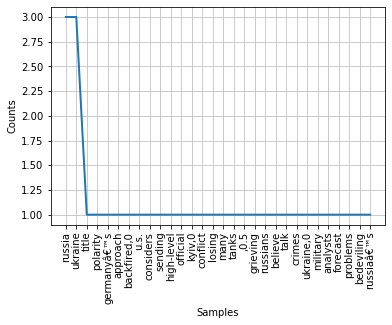

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30,cumulative=False)

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Visualising the distribution of words using matplotlib and wordcloud

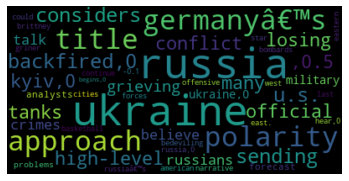

In [41]:
wordcloud = WordCloud(max_font_size=50, max_words=100,
background_color="black").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Implementing LSA using Gensim

In [42]:
! pip install langdetect

## Import the required libraries and packages

In [43]:
import re
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect

In [44]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


## Import the required libraries and packages

In [45]:
#import modules
import os.path 
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt
import nltk

## Loading Data

In [46]:
def load_data(path,file_name):
    documents_list = []

    titles=[]
    
    with open( os.path.join('articles.csv') ,"r") as fin:
        for line in fin.readlines ():
            text=line.strip()
            documents_list.append(text)
    print("Total Mumber of Documents:" ,len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

##  Pre-processing Data

In [47]:
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower() 
        tokens = tokenizer.tokenize(raw) 
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

## Prepare the corpus by creating document-term matrix

In [48]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [49]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Frequency distribution

In [50]:
import pandas as pd
data=pd.read_table('articles.csv', sep=',')

import nltk
from nltk.tokenize import word_tokenize
review = data.title.str.cat(sep=' ')

tokens = word_tokenize(review)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

68


In [51]:
frequency_dist = nltk.FreqDist(tokens)

## Split your data into train and test

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
data['title'], data['url'], test_size=0.3, random_state=1)

## Extract features using TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(5, 41) (3, 41)


In [54]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

from sklearn.metrics import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.0


total number:  8
positive number:  0
negative number:  5
neutral number:  3


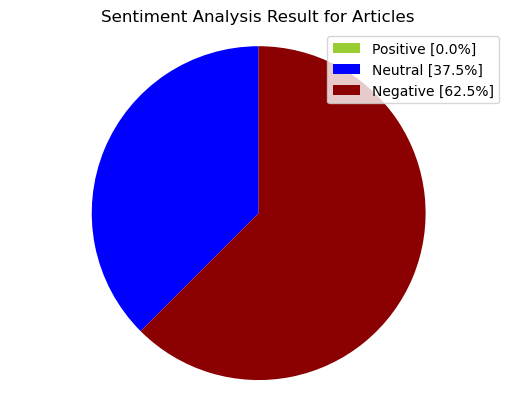

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

csv_file_name='articles.csv'

df=pd.read_csv(csv_file_name)
df.head()
tweets=df['title'].tolist();

def percentage(part,whole):  
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(tweets))
negative = percentage(negative, len(tweets))
neutral = percentage(neutral, len(tweets))
polarity = percentage(polarity, len(tweets))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))



labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','darkred']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for Articles")
plt.axis("equal")
plt.show()

In [58]:
from textblob import TextBlob

In [59]:
articles= pd.read_csv('articles.csv')
articles = articles.reset_index()
polarity_data=[]

for index in articles.index:
    title=articles['title'][index]
    url=articles['url'][index]
    testimonial = TextBlob(title)
    polarity_data.append({'title':title,'url': url,'polarity':testimonial.sentiment.polarity})
#print(polarity_data)

df = pd.DataFrame.from_dict(polarity_data) 
df.to_csv('articles.csv',encoding='utf-8',index=False)

In [60]:
!pip3 install newspaper3k

In [63]:
import nltk
from newspaper import Article

#url for 1st article
url='https://www.nytimes.com/2022/04/08/podcasts/the-daily/germany-russia-oil-gas.html'

#url for 2nd article
url='https://www.nytimes.com/2022/04/13/world/europe/us-official-kyiv-ukraine.html'

#url for 3rd article
url='https://www.bbc.co.uk/news/world-61021388'

#url for aticle 4
url='https://www.bbc.co.uk/news/world-europe-61073897'

#url for article 5
url='https://www.nytimes.com/live/2022/04/23/world/ukraine-russia-war-news'

article=Article(url)

article.download()
article.parse()
nltk.download('punkt')
article.nlp()

print(article.authors)
print(article.text)
print(article.summary)

['Marc Santora', 'Michael Schwirtz', 'Michael Levenson', 'The New York Times', 'Nancy Ramsey', 'Eduardo Medina', 'Lynsey Addario', 'Alan Yuhas', 'Cassandra Vinograd', 'Victoria Kim']
A Soviet-era monument in Chisinau, the capital of Moldova, in March. The war in Ukraine has stoked fears in Moldova of renewed pressures from Russia.

CHISINAU, Moldova — Before war erupted next door, Moldovans had big plans for their country.

But the Russian invasion of Ukraine put Moldova, a former Soviet republic and one of Europe’s poorest nations, in an extremely vulnerable situation, threatening its economic development, straining its society with waves of refugees and evoking existential fears of yet another Russian occupation.

The war jitters are also adding another chapter to Moldova’s long and increasingly desperate effort to untangle itself from Moscow’s clutches. In pursuit of that, it recently applied to join the European Union, but the prospect of gaining admission anytime soon is remote.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
